<a href="https://colab.research.google.com/github/rraisanr915/RaisaNurima-Data-Analyst-Portfolio/blob/main/Practice_Social_Media_Engagement_EDA_(1)_1_agustus_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project analyzes 100 social media posts across Facebook, Instagram, and Twitter to uncover what factors influence engagement—likes, comments, and shares. I also explore how sentiment and post type impact performance.

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/divyaraj2006/social-media-engagement/data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: raisanoerima
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/divyaraj2006/social-media-engagement


100%|██████████| 2.09k/2.09k [00:00<00:00, 3.06MB/s]

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/social-media-engagement/social_media_engagement1.csv')
print(df.head(5))

   post_id   platform post_type        post_time  likes  comments  shares  \
0        1   Facebook     image  8/17/2023 14:45   2121       474     628   
1        2   Facebook  carousel   5/14/2023 0:45   3660       432     694   
2        3  Instagram      poll  2/21/2023 16:15   4955       408     688   
3        4    Twitter     image  11/16/2023 0:45   1183        90     187   
4        5    Twitter     video   5/23/2023 0:30   3499       247     286   

   post_day sentiment_score  
0  Thursday        positive  
1    Sunday         neutral  
2   Tuesday        negative  
3  Thursday        negative  
4   Tuesday        positive  


In [ ]:
print(df.describe())
print(df.info())

          post_id        likes   comments      shares
count  100.000000   100.000000  100.00000  100.000000
mean    50.500000  2381.810000  202.66000  415.650000
std     29.011492  1632.573284  138.84067  283.877601
min      1.000000    15.000000   10.00000   16.000000
25%     25.750000   895.750000   89.75000  183.000000
50%     50.500000  2220.000000  171.00000  356.500000
75%     75.250000  3593.250000  299.00000  689.500000
max    100.000000  5000.000000  500.00000  993.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   post_id          100 non-null    int64 
 1   platform         100 non-null    object
 2   post_type        100 non-null    object
 3   post_time        100 non-null    object
 4   likes            100 non-null    int64 
 5   comments         100 non-null    int64 
 6   shares           100 non-null    int64 
 7   p

In [ ]:
#Convert post_time to datetime
df['post_time']=pd.to_datetime(df['post_time'])

#Time-based Features
df['post_hour']=df['post_time'].dt.hour
df['post_day']=df['post_time'].dt.day_name()

# Convert sentiment to category
df['sentiment_score'] = df['sentiment_score'].astype('category')

print(df.head(10))

   post_id   platform post_type           post_time  likes  comments  shares  \
0        1   Facebook     image 2023-08-17 14:45:00   2121       474     628   
1        2   Facebook  carousel 2023-05-14 00:45:00   3660       432     694   
2        3  Instagram      poll 2023-02-21 16:15:00   4955       408     688   
3        4    Twitter     image 2023-11-16 00:45:00   1183        90     187   
4        5    Twitter     video 2023-05-23 00:30:00   3499       247     286   
5        6  Instagram  carousel 2023-05-05 20:00:00    256       186     211   
6        7  Instagram     image 2023-02-26 11:45:00   1982        30     906   
7        8  Instagram      text 2023-10-28 19:30:00   1274        45     216   
8        9   Facebook     video 2023-05-02 06:15:00    317       249     221   
9       10    Twitter  carousel 2023-05-11 11:00:00   1878       225     438   

   post_day sentiment_score  post_hour  
0  Thursday        positive         14  
1    Sunday         neutral          

In [ ]:
df.dtypes

,0
post_id,int64
platform,object
post_type,object
post_time,datetime64[ns]
likes,int64
comments,int64
shares,int64
post_day,object
sentiment_score,category
post_hour,int32


#Exploratory Data Analysis (EDA)


## a. Distribution of Post Types



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

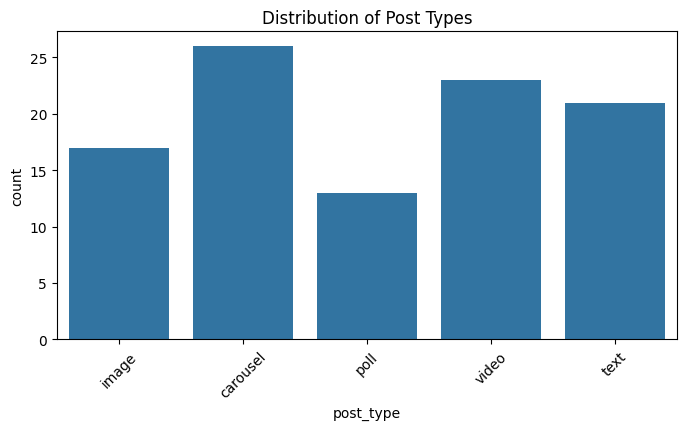

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='post_type',data=df)
plt.title('Distribution of Post Types')
plt.xticks(rotation=45)
plt.show

## b. Engagement per Platform

 Engagement per platform adalah mengukur seberapa aktif pengguna berinteraksi dengan konten pada masing-masing platform media sosial, seperti Instagram, Facebook, atau Twitter.

<function matplotlib.pyplot.show(close=None, block=None)>

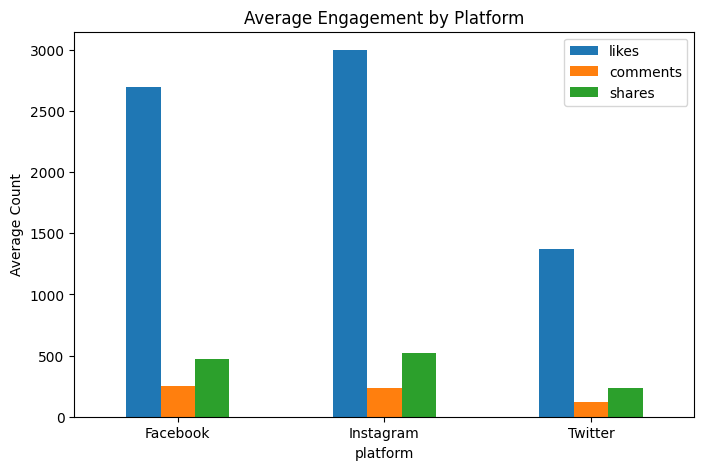

In [ ]:
df_platform=df.groupby('platform')[['likes','comments','shares']].mean().reset_index()
df_platform.plot(x='platform',kind='bar',figsize=(8,5))
plt.title('Average Engagement by Platform')
plt.ylabel('Average Count')
plt.xticks(rotation=0)
plt.show

**📈 Interpretasi dari Grafik:**

**Instagram:**
*   Memiliki rata-rata likes tertinggi (~3000)
*   Comments dan shares juga lebih tinggi dari
platform lain

**Facebook:**

*   Rata-rata likes sedikit di bawah Instagram
*Comments dan shares juga lumayan tinggi, tapi masih di bawah Instagram

**Twitter:**
* Engagement paling rendah dari ketiga platform
* Rata-rata likes, comments, dan shares lebih kecil dibanding Instagram & Facebook

**🧠 Kesimpulan:**
* Instagram adalah platform dengan engagement
per postingan tertinggi.
* Twitter memiliki interaksi paling rendah secara rata-rata.
* Ini menunjukkan bahwa konten yang diposting di Instagram lebih menarik atau audiensnya lebih aktif berinteraksi dibanding platform lain.

## c. Sentiment Impact on Likes

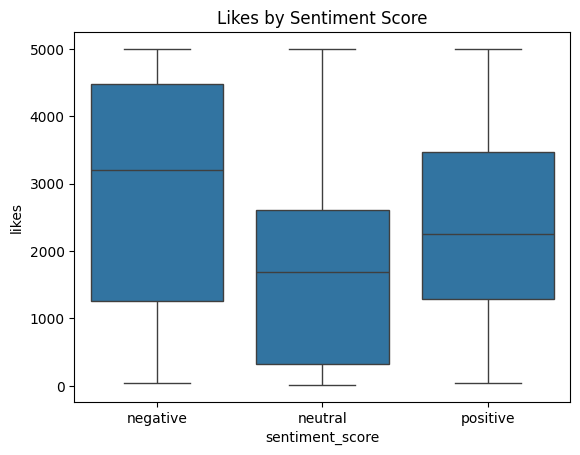

In [ ]:
sns.boxplot(x='sentiment_score',y='likes',data=df)
plt.title('Likes by Sentiment Score')
plt.show()

**📊 Interpretasi Grafik:**

**1. Sentimen Negatif:**
* Memiliki median likes paling tinggi.
* Rentang likes juga lebar (variatif), artinya ada postingan negatif yang sangat populer.
* Mungkin kontennya provokatif atau kontroversial, sehingga menarik perhatian.

**2. Sentimen Positif:**
* Median-nya lebih rendah dari negatif, tapi lebih tinggi dari netral.
* Distribusinya cukup stabil.

**3. Sentimen Netral:**
* Memiliki median likes paling rendah.
* Menunjukkan bahwa konten netral cenderung tidak banyak menarik interaksi.

**🧠 Kesimpulan Sementara:**
Postingan dengan sentimen negatif cenderung mendapatkan likes lebih tinggi dibanding netral atau positif, setidaknya dari median dan distribusi yang ditampilkan.

Ini bisa berarti:

* Orang lebih tertarik pada konten yang mengandung emosi kuat (meski negatif)
* Konten netral cenderung kurang menarik perhatian

In [ ]:
from scipy.stats import shapiro

stat, p = shapiro(df['likes'])  # contoh uji normalitas untuk kolom 'likes'
print('Statistik:', stat)
print('p-value:', p)

if p > 0.05:
    print("Data likes berdistribusi normal")
else:
    print("Data likes tidak berdistribusi normal")


Statistik: 0.9248791900002298
p-value: 2.579053588570926e-05
Data likes tidak berdistribusi normal


In [ ]:
from scipy.stats import kruskal

# Membagi likes berdasarkan sentimen
likes_neg = df[df['sentiment_score'] == 'negative']['likes']
likes_neu = df[df['sentiment_score'] == 'neutral']['likes']
likes_pos = df[df['sentiment_score'] == 'positive']['likes']

# Kruskal-Wallis Test
kruskal_result = kruskal(likes_neg, likes_neu, likes_pos)
print(kruskal_result)


KruskalResult(statistic=np.float64(5.646605919540645), pvalue=np.float64(0.059409391457228525))


📌 Interpretasi:
* p-value = 0.0594
* Karena p-value > 0.05, tidak ada perbedaan signifikan secara statistik dalam jumlah likes antara ketiga kategori sentimen (negative, neutral, positive) pada tingkat signifikansi 5%.

Namun, p-value ini mendekati 0.05, artinya ada indikasi perbedaan yang mungkin signifikan secara praktis atau jika Anda menggunakan tingkat signifikansi 10% (0.1).

💡 Penjelasan Visualisasi Boxplot:
* Negative sentiment tampaknya punya median likes tertinggi dan distribusi yang lebih lebar.
* Neutral sentiment punya median dan sebaran yang lebih rendah.
* Positive sentiment berada di antara keduanya.

Meskipun secara visual terlihat adanya perbedaan, secara statistik (pada α = 0.05) perbedaan tersebut belum cukup kuat untuk dinyatakan signifikan menurut Kruskal-Wallis test.

## d. Time of Day and Engagement

membuat 4 rentang waktu (interval):

00:00–05:59 → Midnight

06:00–11:59 → Morning

12:00–17:59 → Afternoon

18:00–23:59 → Evening

In [ ]:
# Group by time of day
heatmap_data = df.groupby('time_category')[['likes', 'comments', 'shares']].mean()

# Optional: reindex to show logical time order
time_order = ['Midnight', 'Morning', 'Afternoon', 'Evening']
heatmap_data = heatmap_data.reindex(time_order)

/tmp/ipython-input-3405051303.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = df.groupby('time_category')[['likes', 'comments', 'shares']].mean()


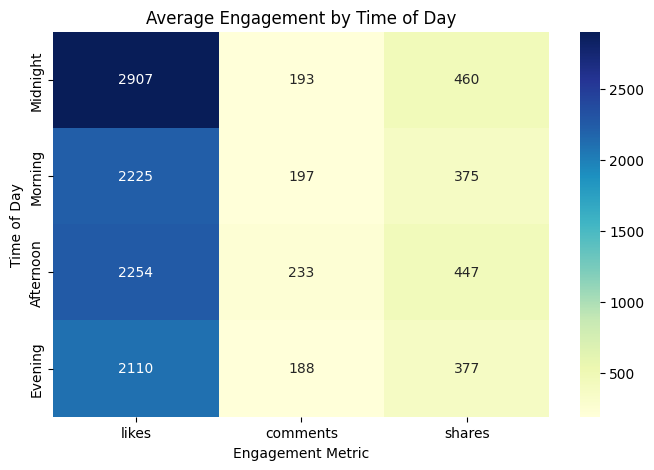

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Average Engagement by Time of Day")
plt.ylabel("Time of Day")
plt.xlabel("Engagement Metric")
plt.show()

In [ ]:

df['time_category'] = pd.cut(df['post_hour'],
                             bins=[0, 6, 12, 18, 24],
                             labels=['Midnight', 'Morning', 'Afternoon', 'Evening'],
                             right=False)

# Total engagement (or use likes/comments/shares individually)
df['total_engagement'] = df['likes'] + df['comments'] + df['shares']


In [ ]:
# Buat pivot table: rata-rata engagement berdasarkan hari dan jam
heatmap_data = df.pivot_table(index='post_day',
                               columns='post_hour',
                               values='total_engagement',
                               aggfunc='mean')

In [ ]:
# Urutkan nama hari
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(day_order)

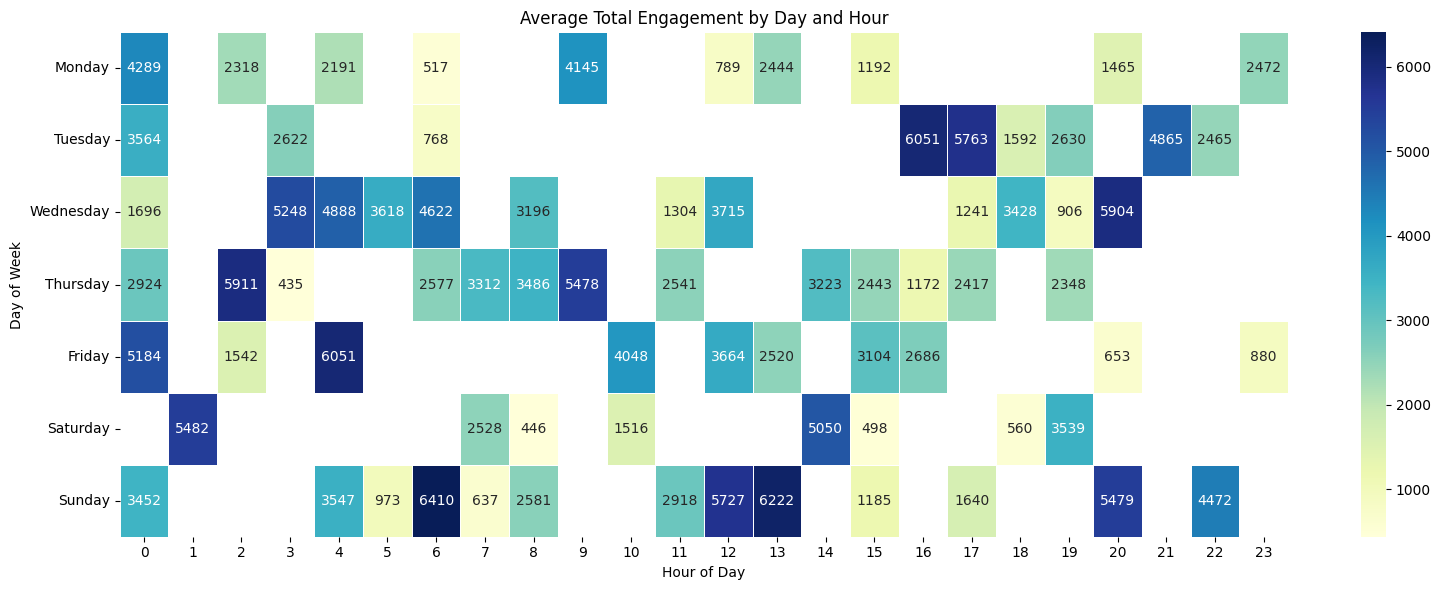

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".0f", linewidths=0.5)
plt.title('Average Total Engagement by Day and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
